In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt  

from jupyterthemes import jtplot

# jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
# theme (str): 'oceans16', 'grade3', 'chesterish', 'onedork', 'monokai', 'solarizedl', 'solarizedd'

## Step 1: combine all data in one df

In [2]:
a=pd.read_csv("RWS_data/2021/IVS_weekmonitor_04FEB2021.csv", sep=';', parse_dates=[4])

In [3]:
#first identify all files in 2021 folder and save their names
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('RWS_data/2021'):
    f.extend(filenames)
    break

In [4]:
#empty list to store data
li=[]

#read everything in as object for now
for filename in f:    
    df = pd.read_csv("RWS_data/2021/"+str(filename), sep=';', index_col=None, header=0, dtype=object)
    if filename != 'IVS_weekmonitor_04FEB2021.csv':
        df.v05_06_begindt_evenement_iso=df.v05_06_begindt_evenement_iso.astype(str)
        for i in df.index:
            df.v05_06_begindt_evenement_iso[i]=parse(df.v05_06_begindt_evenement_iso[i])
        
        df.rename(columns={'v05_06_begindt_evenement_iso':'Date'}, inplace=True)
        
    else:
        df.rename(columns={'v05_06_Begindt_evenement':'Date'},inplace=True)
        
    print(filename,'handled')
    li.append(df)

#create df
df_2021 = pd.concat(li, axis=0, ignore_index=True)

IVS_weekmonitor_02SEP2021.csv handled
IVS_weekmonitor_03JAN2022.csv handled
IVS_weekmonitor_04FEB2021.csv handled
IVS_weekmonitor_04MAR2021.csv handled
IVS_weekmonitor_05AUG2021.csv handled
IVS_weekmonitor_05DEC2021.csv handled
IVS_weekmonitor_05JUL2021.csv handled
IVS_weekmonitor_05JUN2021.csv handled
IVS_weekmonitor_05MAY2021.csv handled
IVS_weekmonitor_05NOV2021.csv handled
IVS_weekmonitor_05OCT2021.csv handled
IVS_weekmonitor_15APR2021.csv handled


In [5]:
#save data
df_2021.to_csv("RWS_data/2021/2021_combined.csv")

## Step 2: data cleaning

In [3]:
df_2021 = pd.read_csv('RWS_data/2021/2021_combined.csv', index_col=0, header=0)

In [4]:
#check data types
df_2021.dtypes

Jaarmaand                   int64
Jaar                        int64
Maand                       int64
Weeknr                      int64
Date                       object
UNLO_herkomst              object
UNLO_bestemming            object
v15_1_Scheepstype_RWS       int64
SK_CODE                    object
v18_Laadvermogen          float64
v28_Beladingscode           int64
v38_Vervoerd_gewicht      float64
v30_4_Containers_TEU_S      int64
nstr_nw                   float64
nst2007_nw                 object
dtype: object

In [5]:
#Convert date to datetime format
df_2021.Date = pd.to_datetime(df_2021.Date, utc=True)

In [6]:
#sort by date
df_2021.sort_values(by='Date', inplace = True)
df_2021.reset_index(drop=True, inplace = True)

In [7]:
#only keep 2021 values
df_2021=df_2021.loc[df_2021.Jaar == 2021]

In [11]:
#check length to see if dropping duplicates works
print(len(df_2021))

385572


In [12]:
#drop duplicates
df_2021.drop_duplicates(keep='first', inplace=True)
print(len(df_2021))

385572


In [13]:
#save data
df_2021.to_csv("RWS_data/2021/2021_combined.csv")

## EDA

In [14]:
import seaborn as sns

In [15]:
#read in cleaned data
df_2021 = pd.read_csv('RWS_data/2021/2021_combined.csv', index_col=0, header=0)

In [38]:
df_2021.head()

,Jaarmaand,Jaar,Maand,Weeknr,Date,UNLO_herkomst,UNLO_bestemming,v15_1_Scheepstype_RWS,SK_CODE,v18_Laadvermogen,v28_Beladingscode,v38_Vervoerd_gewicht,v30_4_Containers_TEU_S,nstr_nw,nst2007_nw
7,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4
8,2101,2021,1,53,2021-01-01 00:00:00+00:00,BEANR,NLTNZ,2,M8,3100.0,3,0.0,0,8.0,8.2
9,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLRTM,DEWOR,4,M8,1160.0,7,604000.0,0,8.0,8.3
10,2101,2021,1,53,2021-01-01 00:00:00+00:00,DESGW,NLRTM,26,BII-6b,17050.0,5,0.0,0,9.0,16
11,2101,2021,1,53,2021-01-01 00:00:00+00:00,BEANR,NLRTM,4,M8,900.0,3,0.0,0,3.0,7.3


In [39]:
df_2021.tail()

,Jaarmaand,Jaar,Maand,Weeknr,Date,UNLO_herkomst,UNLO_bestemming,v15_1_Scheepstype_RWS,SK_CODE,v18_Laadvermogen,v28_Beladingscode,v38_Vervoerd_gewicht,v30_4_Containers_TEU_S,nstr_nw,nst2007_nw
414141,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2
414142,2112,2021,12,52,2021-12-31 22:00:00+00:00,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2
414143,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5
414144,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,DEDUI,1,M11,5210.0,7,2187044.0,276,9.0,12.1
414145,2112,2021,12,52,2021-12-31 22:00:00+00:00,FRSXB,NLNIJ,9,C3l,3430.0,7,2178061.0,153,9.0,19.2


In [17]:
df_2021.describe()

,Jaarmaand,Jaar,Maand,Weeknr,v15_1_Scheepstype_RWS,v18_Laadvermogen,v28_Beladingscode,v38_Vervoerd_gewicht,v30_4_Containers_TEU_S,nstr_nw
count,385572.000000,385572.0,385572.000000,385572.000000,385572.000000,385572.000000,385572.000000,2.781340e+05,385572.000000,274888.000000
mean,2106.556866,2021.0,6.556866,26.526524,2.955204,2445.798372,4.848360,1.243360e+06,14.549905,5.644979
std,3.438352,0.0,3.438352,14.977817,5.252690,2521.142140,2.665351,1.583801e+06,50.753340,2.822836
min,2101.000000,2021.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,2104.000000,2021.0,4.000000,14.000000,1.000000,1100.000000,1.000000,2.420000e+05,0.000000,3.000000
50%,2107.000000,2021.0,7.000000,26.000000,1.000000,1820.000000,7.000000,9.960000e+05,0.000000,6.000000
75%,2110.000000,2021.0,10.000000,40.000000,2.000000,3160.000000,7.000000,1.700000e+06,0.000000,8.000000
max,2112.000000,2021.0,12.000000,53.000000,36.000000,100000.000000,7.000000,9.999900e+07,1700.000000,9.000000


### Seasonality?

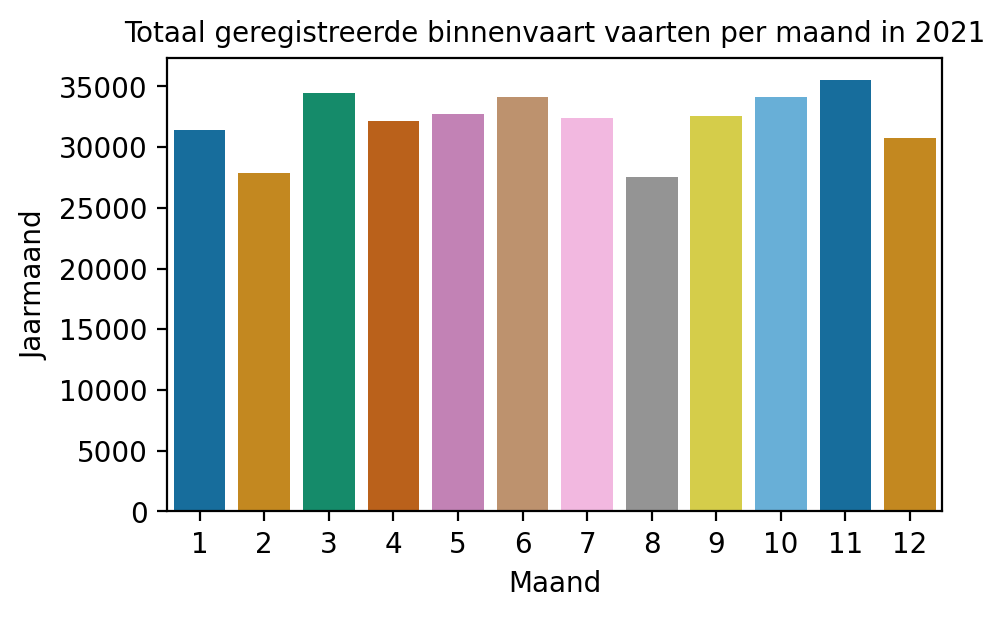

In [28]:
count = df_2021.groupby(by='Maand').count()
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors=sns.color_palette('colorblind')
sns.barplot(x=count.index, y=count.Jaarmaand, palette=colors)
plt.title('Totaal geregistreerde binnenvaart vaarten per maand in 2021', fontsize=10)
plt.show()


Text(0.5, 1.0, 'Totaal vervoerd gewicht per maand in 2021')

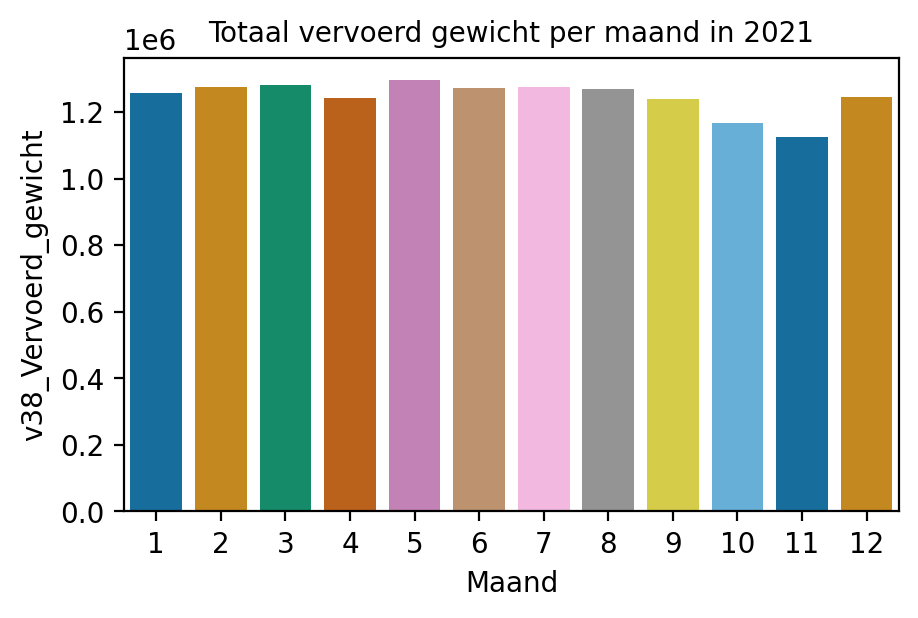

In [65]:
mean = df_2021.groupby(by='Maand').mean()
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
sns.barplot(x=mean.index, y=mean.v38_Vervoerd_gewicht, palette='colorblind')
plt.title('Totaal vervoerd gewicht per maand in 2021', fontsize=10)

### Most frequented destinations

In [47]:
df_2021

,Jaarmaand,Jaar,Maand,Weeknr,Date,UNLO_herkomst,UNLO_bestemming,v15_1_Scheepstype_RWS,SK_CODE,v18_Laadvermogen,v28_Beladingscode,v38_Vervoerd_gewicht,v30_4_Containers_TEU_S,nstr_nw,nst2007_nw
7,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4
8,2101,2021,1,53,2021-01-01 00:00:00+00:00,BEANR,NLTNZ,2,M8,3100.0,3,0.0,0,8.0,8.2
9,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLRTM,DEWOR,4,M8,1160.0,7,604000.0,0,8.0,8.3
10,2101,2021,1,53,2021-01-01 00:00:00+00:00,DESGW,NLRTM,26,BII-6b,17050.0,5,0.0,0,9.0,16
11,2101,2021,1,53,2021-01-01 00:00:00+00:00,BEANR,NLRTM,4,M8,900.0,3,0.0,0,3.0,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414141,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2
414142,2112,2021,12,52,2021-12-31 22:00:00+00:00,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2
414143,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5
414144,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,DEDUI,1,M11,5210.0,7,2187044.0,276,9.0,12.1


In [19]:
dests = df_2021.groupby(by='UNLO_bestemming').count().sort_values('Jaarmaand',ascending=False)[:10]
depa = df_2021.groupby(by='UNLO_herkomst').count().sort_values('Jaarmaand',ascending=False)[:10]

dests_20 = df_2021.groupby(by='UNLO_bestemming').count().sort_values('Jaarmaand',ascending=False)[:20]
depa_20 = df_2021.groupby(by='UNLO_herkomst').count().sort_values('Jaarmaand',ascending=False)[:20]

In [20]:
print("Share of top 10 dests =", (dests.Jaarmaand.sum()/len(df_2021)*100))
print("Share of top 10 depa =", (dests.Jaarmaand.sum()/len(df_2021)*100))

print("Share of top 20 dests =", (dests_20.Jaarmaand.sum()/len(df_2021)*100))
print("Share of top 20 depa =", (dests_20.Jaarmaand.sum()/len(df_2021)*100))

Share of top 10 dests = 42.457958565455996
Share of top 10 depa = 42.457958565455996
Share of top 20 dests = 49.96187482493542
Share of top 20 depa = 49.96187482493542


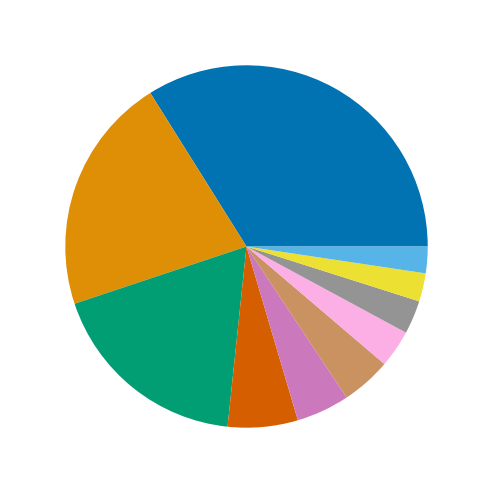

In [21]:
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors = sns.color_palette('colorblind')
ax = plt.pie(dests.Jaarmaand, colors=colors)
plt.show()

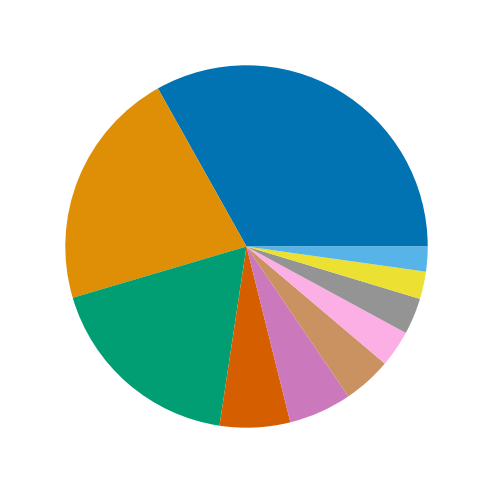

In [22]:
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors = sns.color_palette('colorblind')
ax = plt.pie(depa.Jaarmaand, colors=colors)
plt.show()

### All trips ranked by mostly executed

In [70]:
all_trips_ranked=df_2021.groupby(by=['UNLO_herkomst','UNLO_bestemming']).count().reset_index().sort_values(by='Jaarmaand',ascending=False).iloc[:,:3].reset_index(drop=True)
all_trips_ranked['Percentage_total_trips']=(all_trips_ranked['Jaarmaand']/len(df_2021))*100

In [71]:
all_trips_ranked.head(20)

,UNLO_herkomst,UNLO_bestemming,Jaarmaand,Percentage_total_trips
0,BEANR,NLRTM,9816,2.545828
1,NLRTM,BEANR,8938,2.318114
2,NLRTM,NLAMS,4988,1.293662
3,NLAMS,NLRTM,4972,1.289513
4,BEANR,BEGNE,3441,0.892440
5,BEANR,NLAMS,2093,0.542830
6,BEGNE,BEANR,2024,0.524934
7,NLAMS,BEANR,1798,0.466320
8,NLRTM,NLRTM,1796,0.465801
9,NLVLI,BEANR,1720,0.446090


## Get network

In [19]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canal|transmission"]')
fig, ax = ox.plot_graph(G)

ModuleNotFoundError: No module named 'osmnx'

In [ ]:
G.edges.get_edge_data()

In [ ]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canals"|rivers]')
fig, ax = ox.plot_graph(G)

In [ ]:
ox.graph_from_place?